In [29]:
import pandas as pd  
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Vẽ Correlation Matrix

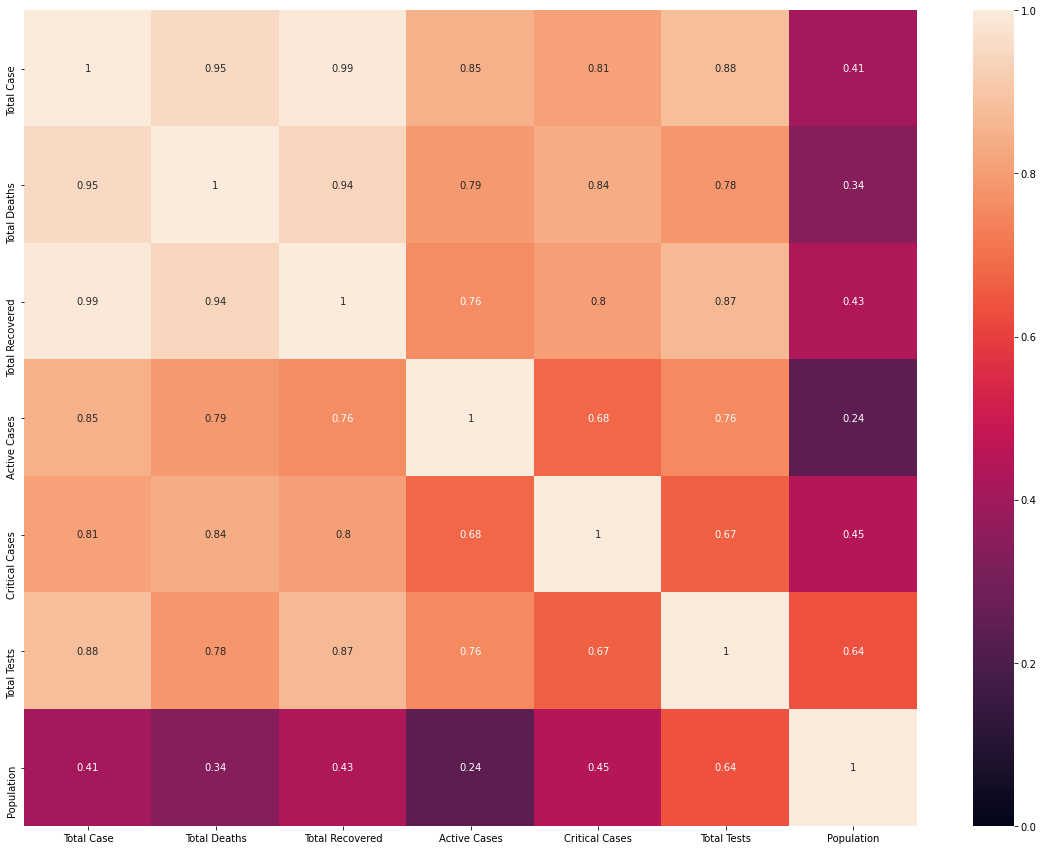

In [30]:
df =pd.read_csv("../data/13-04.csv")

with open("list_attributes") as f:
    attrs = f.readlines()

attrs = [ attr.strip() for attr in attrs]
n_attrs = len(attrs)

plt.subplots(figsize = (20,15))
corr_matrix = df[attrs].corr()
sn.heatmap(corr_matrix, annot=True, vmin = 0, vmax = 1)
plt.show()

## Quan hệ giữa 2 biến

In [31]:
def single_linear_regression(ax, X, Y):
    X = X.values
    Y = Y.values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()

    # Get parameters, p-value and Adjusted R squared
    w = results.params
    p_values = results.pvalues
    adj_r_sqrt = results.rsquared_adj
    
    # Draw regression line
    draw_line(ax, results.params, x_min = np.min(X), x_max = np.max(X))
    display_p_value_adj_r_sqrt(ax, p_values[1], adj_r_sqrt)

    return w, p_values, adj_r_sqrt
    # w1 = (np.mean(X * Y) / np.mean(X) * np.mean(Y)) / (np.mean(X * X) - np.mean(X) ** 2)
    # w0 = np.mean(Y) - w1 * np.mean(X)
    # Xp = np.linspace(np.min(X), np.max(X), 100) 
    # Yp = w0 + Xp * w1
    # ax.plot(Xp, Yp)
    # return w0, w1

def draw_line(ax, w, x_min, x_max):
    Xp = np.linspace(x_min, x_max, 100) 
    Yp = w[0] + Xp * w[1]
    ax.plot(Xp, Yp)

def display_p_value_adj_r_sqrt(ax, p_value, adj_r_sqrt):
    p_value = "{:.2e}".format(p_value)
    adj_r_sqrt = round(adj_r_sqrt, 6)
    ax.annotate(f"p-value=" + p_value, (350, 30), xycoords='axes pixels', fontsize=15)
    ax.annotate(r"$R^2_{adj}=$" + f'{adj_r_sqrt}', (350, 5), xycoords='axes pixels', fontsize=15)

def display_title(ax, x, y, w):
    ax.set_title(f"{y} = {round(w[0], 2)} + {x}*{round(w[1], 6)}", fontsize = 20)

# def RSS(X, Y, w0, w1):
#     res = 0.0
#     for xi, yi in zip(X, Y):
#         res += (yi - w0 - w1 * xi) ** 2
#     return res


# def TSS(Y):
#     return np.var(Y.values)


# def R_quared(X, Y, w0, w1):
#     return 1 - (RSS(X, Y, w0, w1) / TSS(Y))


# def Ajusted_R_squared(X, Y, w0, w1, k = 1):
#     n = len(Y)
#     return 1 - (1 - R_quared(X, Y, w0, w1)) * (n - 1) / (n - k - 1)


def linear_regression(X, Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()

    # Get parameters, p-value and Adjusted R squared
    w = results.params
    p_values = results.pvalues
    adj_r_sqrt = results.rsquared_adj

    return results

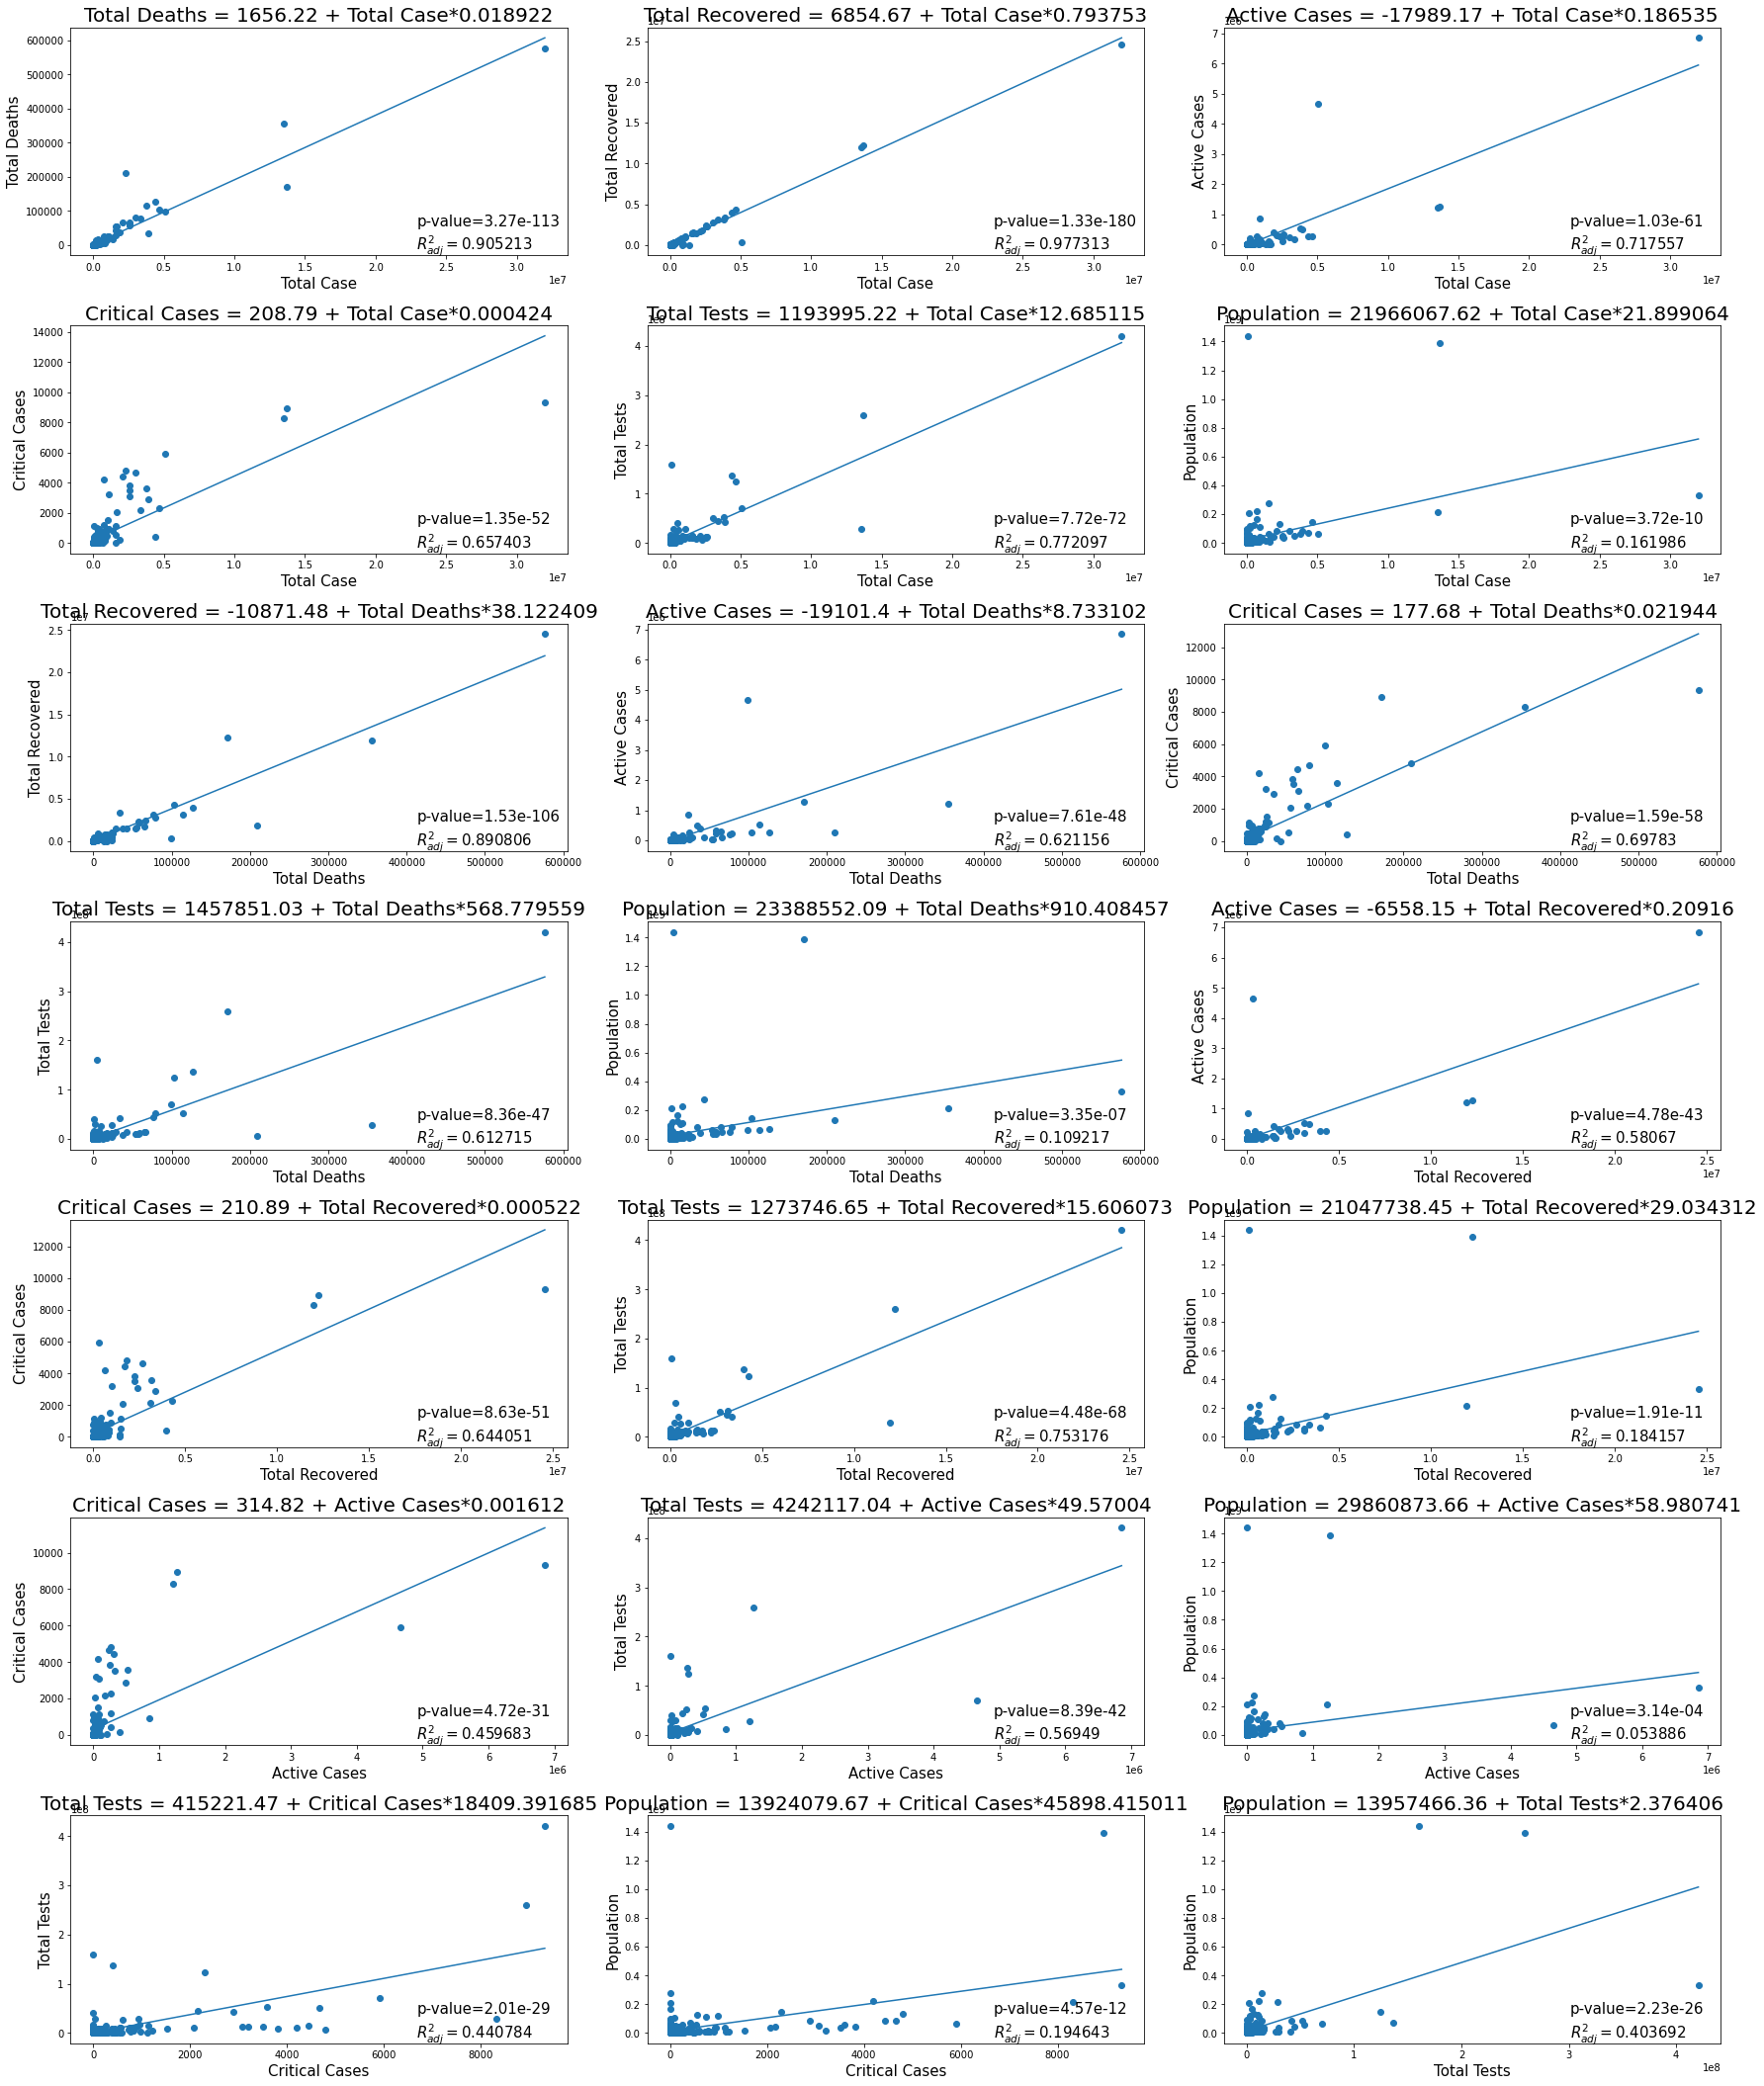

In [32]:
fig, axs = plt.subplots(7,3, figsize=(25,30))
fig.tight_layout(pad=5.0)
cnt = 0
for i in range(n_attrs - 1):
    for j in range(i + 1, n_attrs):
        axs[cnt // 3, cnt % 3].scatter(df[attrs[i]], df[attrs[j]])
        axs[cnt // 3, cnt % 3].set_xlabel(attrs[i], fontsize=15)
        axs[cnt // 3, cnt % 3].set_ylabel(attrs[j], fontsize=15)
        w, p_values, adj_r_sqrt = single_linear_regression(axs[cnt // 3, cnt % 3], df[attrs[i]], df[attrs[j]])
        display_title(axs[cnt // 3, cnt % 3], attrs[i], attrs[j], w)
        cnt+=1
plt.show()

In [35]:
for i in range(n_attrs - 2):
    for j in range(i + 1, n_attrs - 1):
        for k in range(j + 1, n_attrs):
            X1 = df[attrs[i]].values
            X2 = df[attrs[j]].values
            X = np.column_stack((X1, X2))
            Y = df[attrs[k]].values
            res = linear_regression(X, Y)
            r_sqrt_adj = res.rsquared_adj
            if(r_sqrt_adj >= 0.7):
                print(attrs[i] + ", " + attrs[j] + ", " + attrs[k])
                print(f"p-value={res.pvalues}, adjusted R squared={r_sqrt_adj}")

Total Case, Total Deaths, Total Recovered
p-value=[8.36396035e-01 7.08839620e-76 3.01892751e-01], adjusted R squared=0.9773204189055205
Total Case, Total Deaths, Active Cases
p-value=[4.93512735e-01 4.92941068e-16 1.11066955e-01], adjusted R squared=0.7195732586311763
Total Case, Total Deaths, Total Tests
p-value=[1.12873967e-01 2.82233984e-33 3.95338355e-08], adjusted R squared=0.8009548142861576
Total Case, Total Recovered, Active Cases
p-value=[1.04900058e-001 8.07046595e-122 2.82774867e-103], adjusted R squared=0.9672743146000476
Total Case, Total Recovered, Total Tests
p-value=[3.39586725e-01 3.33893894e-05 8.71092937e-01], adjusted R squared=0.771070142052444
Total Case, Active Cases, Total Tests
p-value=[3.24237304e-01 9.58674339e-32 5.43421101e-01], adjusted R squared=0.7714341250582482
Total Case, Critical Cases, Total Tests
p-value=[1.16592183e-01 2.12042505e-45 1.08031674e-02], adjusted R squared=0.7778422523929489
Total Deaths, Total Recovered, Total Tests
p-value=[1.874072

In [36]:
for i in range(n_attrs - 3):
    for j in range(i + 1, n_attrs - 2):
        for k in range(j + 1, n_attrs - 1):
            for t in range(k + 1, n_attrs):
                X1 = df[attrs[i]].values
                X2 = df[attrs[j]].values
                X3 = df[attrs[k]].values
                X = np.column_stack((X1, X2, X3))
                Y = df[attrs[t]].values
                res = linear_regression(X, Y)
                r_sqrt_adj = res.rsquared_adj
                if(r_sqrt_adj >= 0.7):
                    print(attrs[i] + ", " + attrs[j] + ", " + attrs[k] + ", " + attrs[t])
                    print(f"p-value={res.pvalues}, adjusted R squared={r_sqrt_adj}")

Total Case, Total Deaths, Total Recovered, Active Cases
p-value=[1.49581065e-001 7.13724770e-117 6.72785747e-002 5.52927317e-103], adjusted R squared=0.9676313162474726
Total Case, Total Deaths, Total Recovered, Total Tests
p-value=[1.14426166e-01 1.53712496e-09 4.19546541e-08 8.21407735e-01], adjusted R squared=0.80007652164057
Total Case, Total Deaths, Active Cases, Total Tests
p-value=[1.13725554e-01 1.30142536e-26 5.13295487e-08 9.71546879e-01], adjusted R squared=0.8000302087694235
Total Case, Total Deaths, Critical Cases, Total Tests
p-value=[8.73311451e-02 3.31598566e-33 9.08346967e-07 4.58911204e-01], adjusted R squared=0.800539761060973
Total Case, Total Recovered, Active Cases, Total Tests
p-value=[0.27214115 0.91524201 0.22833028 0.18061622], adjusted R squared=0.771919367984274
Total Case, Total Recovered, Critical Cases, Total Tests
p-value=[1.16927822e-01 4.47583311e-06 8.92259686e-01 1.10367084e-02], adjusted R squared=0.776828048462679
Total Case, Active Cases, Critical